In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
import pandas as pd
df = pd.read_csv('/drive/My Drive/Colab Notebooks/data/kaggle_digits/Kaggle-digit-train.csv')

In [64]:
import pandas as pd
import re
import os
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [5]:
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)

# Split the data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
#z-scoring
#normalization(Z-scoring)
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
X=sd.transform(X)

# Validation Curve with RF

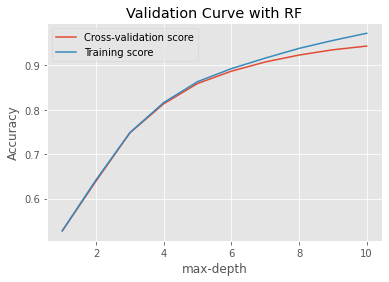

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range=np.arange(1, 11)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel("max-depth")
plt.ylabel("Accuracy")

#Generate plot
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.plot(param_range, train_scores_mean, label='Training score')
plt.legend()
plt.show()

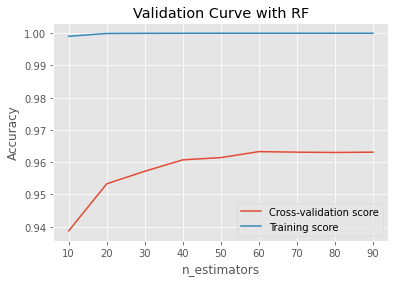

In [31]:
#n_estimators
param_range=np.arange(start=10, stop=100, step=10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")

#Generate plot
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.plot(param_range, train_scores_mean, label='Training score')
plt.legend()
plt.show()

# GridSearch CV


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

## Choose the type of classifier 
model = RandomForestClassifier()

## Choose some parameter combinations to try
parameters = {'n_estimators': [10,20,30,40,50,60,70,80,90,100], 
             'max_features': ['log2', 'sqrt','auto'], 
             'criterion': ['entropy'],
             'max_depth': [4,5,6,7,8], 
             'min_samples_split': [1572],
             'min_samples_leaf': [786],
             'n_jobs': [-1],
             'random_state': [1]
             }

## Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

## Run the grid Search
grid_obj = GridSearchCV(model, parameters, scoring = acc_scorer, n_jobs = -1, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the clf to the best combination of parameters
model_rf_final = grid_obj.best_estimator_

## Fit the best algorithm to the data. 
model_rf_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=786, min_samples_split=1572, n_jobs=-1,
                       random_state=1)

In [33]:
#get the predictions using the classifier fitted above
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf1=RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=786, min_samples_split=1572, n_jobs=-1,
                       random_state=1)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
rf1.score(X_test,y_test)

0.8077777777777778

In [34]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
True,,,,,,,,,,,
0.0,1196,0,6,9,1,1,15,3,16,0,1247
1.0,0,1382,0,5,0,0,3,3,1,1,1395
2.0,26,72,1041,17,13,0,39,35,11,3,1257
3.0,34,53,54,1062,5,13,18,40,22,20,1321
4.0,8,22,8,0,1012,0,43,19,8,112,1232
5.0,109,103,6,275,37,448,40,19,21,53,1111
6.0,52,50,16,1,16,4,1111,6,2,0,1258
7.0,9,47,29,1,17,0,1,1130,4,47,1285
8.0,44,124,17,74,13,0,32,14,855,76,1249


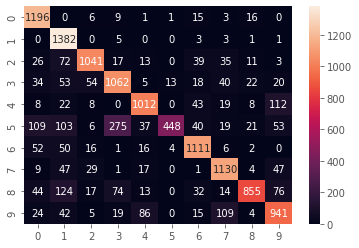

In [35]:
#heat map
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_test,rf1.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [22]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1247
         1.0       0.75      0.98      0.85      1395
         2.0       0.86      0.78      0.81      1257
         3.0       0.71      0.77      0.74      1321
         4.0       0.86      0.77      0.81      1232
         5.0       0.94      0.41      0.57      1111
         6.0       0.81      0.85      0.83      1258
         7.0       0.80      0.89      0.85      1285
         8.0       0.86      0.73      0.79      1249
         9.0       0.73      0.80      0.76      1245

    accuracy                           0.80     12600
   macro avg       0.82      0.79      0.79     12600
weighted avg       0.81      0.80      0.79     12600



# Learning Curve

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

8.8881356716156


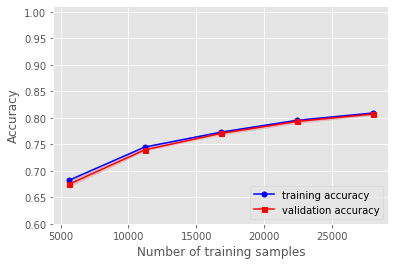

In [43]:
# RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import time
start = time.time()

pipe_rf = make_pipeline(StandardScaler(),  RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=786, min_samples_split=1572, n_jobs=-1,
                       random_state=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf, X=X, y=y, cv=3,train_sizes=[0.2,0.4,0.6,0.8,1.0], n_jobs=-1,random_state=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,
                 train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.6, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)

# Gradient Boosting

In [7]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [44]:
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#z-scoring
#normalization(Z-scoring)
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)
X=sd.transform(X)

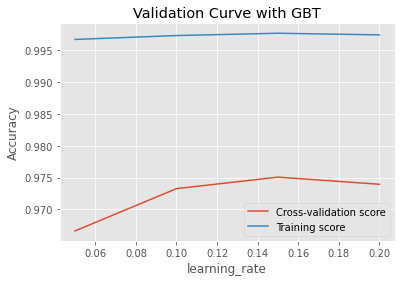

In [47]:
#tune on validation curves
#learning rate
from sklearn.ensemble import HistGradientBoostingClassifier
param_range=np.arange(start=0.05, stop=0.20, step=0.05)
train_scores, test_scores = validation_curve(
    HistGradientBoostingClassifier(), X, y, param_name="learning_rate", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with GBT")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")

#Generate plot
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.plot(param_range, train_scores_mean, label='Training score')
plt.ylim([0.7, 1.01])
plt.legend()
plt.show()

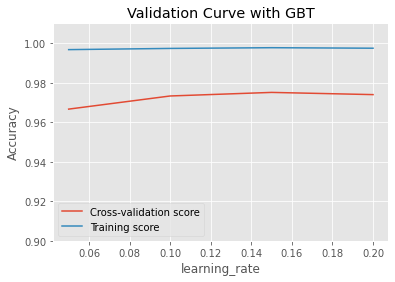

In [51]:
#Generate plot
plt.title("Validation Curve with GBT")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.plot(param_range, train_scores_mean, label='Training score')
plt.ylim([0.9, 1.01])
plt.legend()
plt.show()

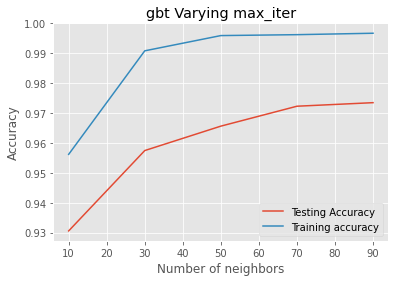

In [54]:
#import HistGradientBoostingClassifier
#max_iter
from sklearn.ensemble import HistGradientBoostingClassifier

#Setup arrays to store training and test accuracies
max_iter=np.arange(start=10, stop=110, step=20)
train_accuracy =np.empty(len(max_iter))
test_accuracy = np.empty(len(max_iter))

for i,k in enumerate(max_iter):
    #Setup a GBT classifier with k estimators
    gbt = HistGradientBoostingClassifier(max_iter=k)
    
    #Fit the model
    gbt.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = gbt.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = gbt.score(X_test, y_test)

#Generate plot
plt.title('gbt Varying max_iter')
plt.plot(max_iter, test_accuracy, label='Testing Accuracy')
plt.plot(max_iter, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

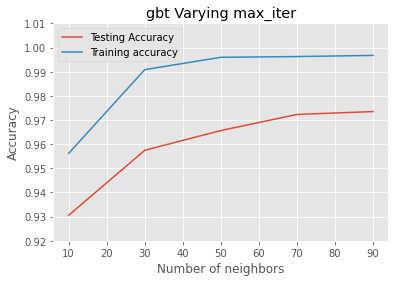

In [57]:
#Generate plot
plt.title('gbt Varying max_iter')
plt.plot(max_iter, test_accuracy, label='Testing Accuracy')
plt.plot(max_iter, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.92, 1.01])
plt.show()

# GridSearch CV

In [59]:

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

## Choose the type of classifier 
model = HistGradientBoostingClassifier()

## Choose some parameter combinations to try
parameters = {'learning_rate':[0.13,0.15,0.17],
              'max_depth': [6], 
              'max_iter': [70,80,90,100],
              'min_samples_leaf': [786],
              'l2_regularization':[1],
              'random_state': [1],
             }

## Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score) 

## Run the grid search
grid_obj = GridSearchCV(model, parameters, scoring = acc_scorer, n_jobs = -1, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

#3 Set the clf to the best combination of parameters
model_gbt_final = grid_obj.best_estimator_

## Fit the best algorithm to the data. 
model_gbt_final.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=1, learning_rate=0.17,
                               max_depth=6, min_samples_leaf=786,
                               random_state=1)

# Performance on selected calssifiers

Accuracy is:  0.972936507936508


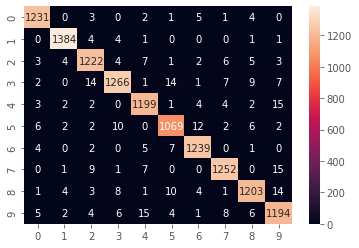

In [60]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score
ac = accuracy_score(y_test,model_gbt_final.predict(X_test))
print('Accuracy is: ',ac)
cmgb = confusion_matrix(y_test,model_gbt_final.predict(X_test))

#heat map
import seaborn as sns
sns.heatmap(cmgb,annot=True,fmt="d")

In [61]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1247
           1       0.73      0.99      0.84      1395
           2       0.88      0.83      0.85      1257
           3       0.73      0.80      0.76      1321
           4       0.84      0.82      0.83      1232
           5       0.96      0.40      0.57      1111
           6       0.84      0.88      0.86      1258
           7       0.82      0.88      0.85      1285
           8       0.91      0.68      0.78      1249
           9       0.75      0.76      0.75      1245

    accuracy                           0.81     12600
   macro avg       0.83      0.80      0.80     12600
weighted avg       0.82      0.81      0.80     12600



# Learning curve

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

244.8709373474121


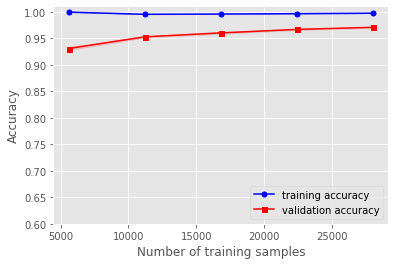

In [63]:
# GBT
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
import time
start = time.time()

pipe_rf = make_pipeline(StandardScaler(),  HistGradientBoostingClassifier(l2_regularization=1, learning_rate=0.17,
                               max_depth=6, min_samples_leaf=786,
                               random_state=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf, X=X, y=y, cv=3,train_sizes=[0.2,0.4,0.6,0.8,1.0], n_jobs=-1,random_state=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,
                 train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.6, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)